In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from statistics_describe import print_statistics
%matplotlib inline

<img src='./BSM.png'>

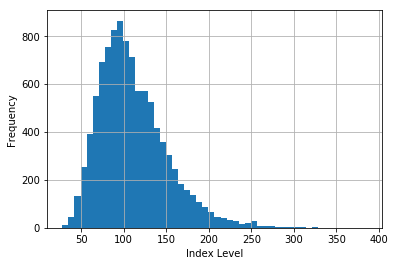

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         27.654         26.117
           max        385.665        388.126
          mean        110.617        110.408
           std         40.355         40.000
          skew       1628.518       1599.963
      kurtosis          1.068          1.134


In [2]:
# initial value
S0 = 100 
# risk-free rate
rate = 0.05 
# constant volatility
sigma = 0.25
# maturity in years
T = 2.0
# number of random draws
I = 10000

ST1 = S0 * np.exp((rate - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * np.random.standard_normal(I))
plt.hist(ST1, bins=50)
plt.xlabel('Index Level')
plt.ylabel('Frequency')


# # Or use the lognormal distribution directly
ST2 = S0 * np.random.lognormal((rate - 0.5 * sigma ** 2) * T, sigma * np.sqrt(T), size=I)
# plt.hist(ST2, bins=50, alpha=0.5)
# plt.xlabel('Index Level')
# plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print_statistics(ST1, ST2)

<img src='./BSM_diff_format.png'>
<img src='./BSM_SDE.png'>

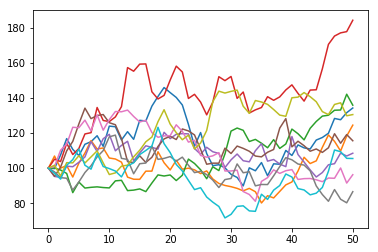

In [3]:
# Stochastic Differential Equation
# number of path
I = 100000
M = 50
# time interval
dt = T / M
# each col represents a path
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((rate - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * np.random.standard_normal(I))

# print(S)
# plt.hist(S[-1], bins = 50)
plt.plot(S[:, :10], linewidth=1.5)
plt.show()